<a href="https://colab.research.google.com/github/parisaagh/AI-HW2/blob/main/water_jug_puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Water-Jug Puzzle**


You have two jugs of water, a five litre jug and a three litre jug. you can fill and empty the jugs as much as you want. how can you get exactly four litres into the five litre jug?


# **Start State**

- [**5L Jug**: 0, **3L Jug**: 0]

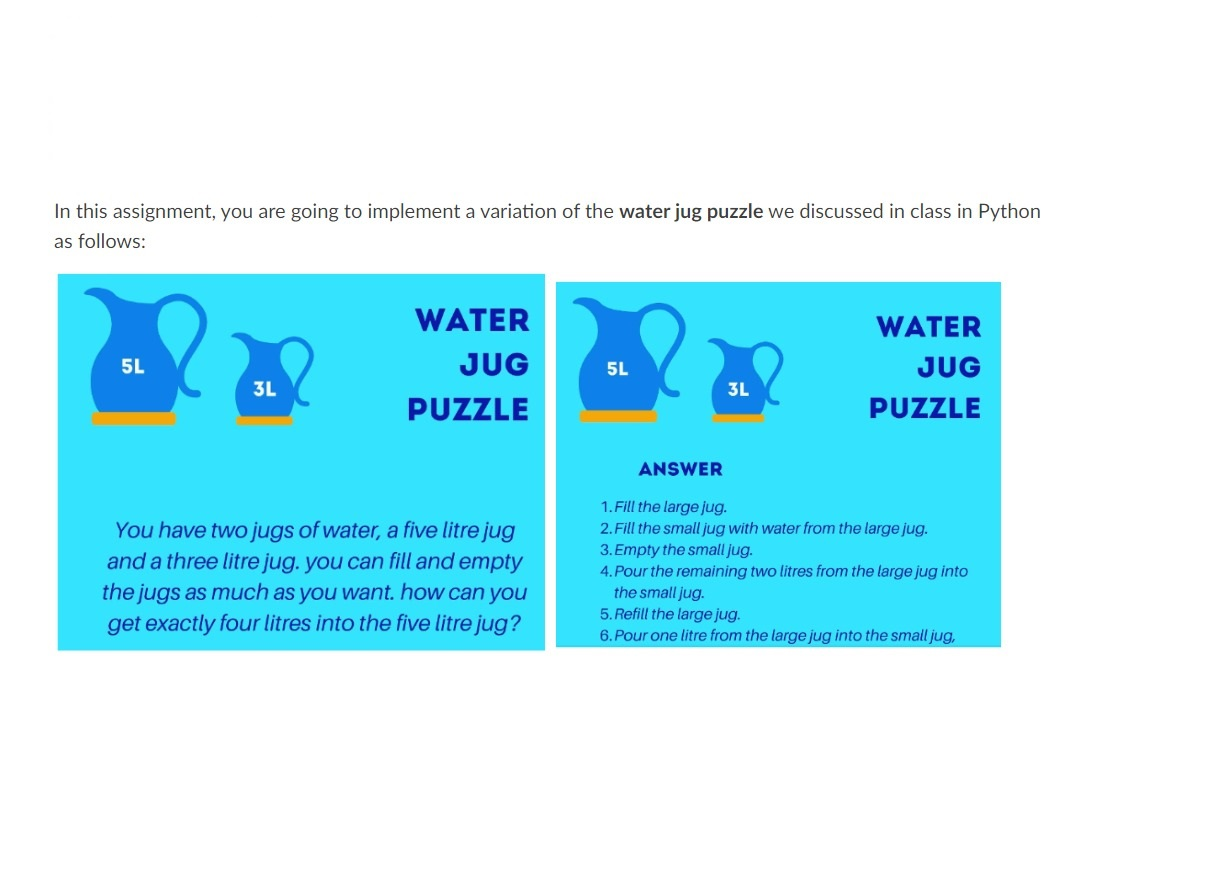


## **Goal State**

- [**5L Jug**: 4, **3L Jug**: not important]
- or
- [**5L Jug**: not important, **3L Jug**: 4]


## **The Solution**

This is a sample solution for two jugs of 5 and 3 to have 4 litre of water:

1. Fill the large jug.
2. Fill the small jug with water from the large jug.
3. Empty the small jug.
4. Pour the remaining two litres from the large jug into the small jug.
5. Refill the large jug.
6. Pour one litre from the large jug into the small jug.

- Initial state: (0, 0)
- Fill jug 5L: (5, 0)
- Pour jug 5L to jug 3L: (2, 3)
- Empty jug 3L: (2, 0)
- Pour jug 5L to jug 3L: (0, 2)
- Fill jug 5L: (5, 2)
- Pour jug 5L to jug 3L: (4, 3)
- Goal reached: (4, 3)


In [ ]:
class WaterJugPuzzle:
    def __init__(self):
        # Initialize the water jug puzzle with capacities and goal
        self.jug_5L_capacity = 5
        self.jug_3L_capacity = 3
        self.goal_p = 4
        self.state = (0, 0)  # Initial state: both jugs are empty

    def is_valid_state(self, state):
        # Check if the given state is within valid limits
        return 0 <= state[0] <= self.jug_5L_capacity and 0 <= state[1] <= self.jug_3L_capacity

    def is_goal_state(self, state):
        # Check if the given state achieves the goal
        return state[0] == self.goal_p or state[1] == self.goal_p

    def rule_fill_jug_5L(self):
        # Rule: Fill jug 5L to its maximum capacity
        new_state = (self.jug_5L_capacity, self.state[1])
        if self.is_valid_state(new_state):
            self.state = new_state
            return True
        return False

    def rule_fill_jug_3L(self):
        # Rule: Fill jug 3L to its maximum capacity
        new_state = (self.state[0], self.jug_3L_capacity)
        if self.is_valid_state(new_state):
            self.state = new_state
            return True
        return False

    def rule_empty_jug_5L(self):
        # Rule: Empty jug 5L
        new_state = (0, self.state[1])
        if self.is_valid_state(new_state):
            self.state = new_state
            return True
        return False

    def rule_empty_jug_3L(self):
        # Rule: Empty jug 3L
        new_state = (self.state[0], 0)
        if self.is_valid_state(new_state):
            self.state = new_state
            return True
        return False

    def rule_pour_jug_5L_to_3L(self):
        # Rule: Pour water from jug 5L to jug 3L
        pour_amount = min(self.state[0], self.jug_3L_capacity - self.state[1])
        new_state = (self.state[0] - pour_amount, self.state[1] + pour_amount)
        if self.is_valid_state(new_state):
            self.state = new_state
            return True
        return False

    def rule_pour_jug_3L_to_5L(self):
        # Rule: Pour water from jug 3L to jug 5L
        pour_amount = min(self.state[1], self.jug_5L_capacity - self.state[0])
        new_state = (self.state[0] + pour_amount, self.state[1] - pour_amount)
        if self.is_valid_state(new_state):
            self.state = new_state
            return True
        return False

    def print_state(self):
        # Display the initial state
        print("===> ", self.state)

    def print_initial_state(self):
        # Display the initial state
        print("Initial state:", self.state)

    def prin_goal_reached(self):
        # Display the final state when the goal is reached
        print("Goal reached:", self.state)

In [ ]:
# @title Forming the Solution

wjp = WaterJugPuzzle()

# print the initial state
wjp.print_initial_state()


print("-----------------------")
# apply a rule and print the resulting state
wjp.rule_fill_jug_5L()
wjp.print_state()

print("-----------------------")
wjp.rule_pour_jug_5L_to_3L()
wjp.print_state()

print("-----------------------")
wjp.rule_empty_jug_3L()
wjp.print_state()

print("-----------------------")
wjp.rule_pour_jug_5L_to_3L()
wjp.print_state()

print("-----------------------")
wjp.rule_fill_jug_5L()
wjp.print_state()

print("-----------------------")
wjp.rule_pour_jug_5L_to_3L()
wjp.print_state()

print("-----------------------")
wjp.prin_goal_reached()

Initial state: (0, 0)
-----------------------
===>  (5, 0)
-----------------------
===>  (2, 3)
-----------------------
===>  (2, 0)
-----------------------
===>  (0, 2)
-----------------------
===>  (5, 2)
-----------------------
===>  (4, 3)
-----------------------
Goal reached: (4, 3)
